In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score

In [5]:
heart = pd.read_csv('../mydata/heart.csv')
heart.head(), heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 None)

In [6]:
X = heart.drop(['target'], axis=1).values
y = heart['target'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
y_pred

Mean Absolute Error: 0.2981361736043105
Mean Squared Error: 0.1309909385704733
Root Mean Squared Error: 0.3619267033122498
Explained Variance Score: 0.47141230607339435


array([ 0.06801472,  0.71681997,  0.73679794,  0.01302379,  0.23606595,
        0.51943293,  0.1832927 ,  0.26862082, -0.18844421, -0.23819858,
        0.65236404,  0.89925409,  0.10829792,  0.76215218,  0.99402895,
        0.62248155,  0.17280607,  0.65143817, -0.14748662,  0.75662605,
        0.72253637,  0.4515309 ,  0.25067708,  0.24118341,  0.80149218,
        0.5818327 ,  0.3186585 ,  0.48354757,  1.06023388,  0.60702415,
        0.62134778, -0.05702169,  1.00480281,  0.65907569,  0.86560243,
        0.57494184,  0.07005343,  0.77550305,  0.18177813,  0.31589193,
        0.66827766,  0.73731671,  0.42602317,  0.18737756,  0.51958253,
        0.64602671,  0.75016333,  0.59514114,  0.13934865,  0.73662645,
        0.78272629,  0.56785086,  1.00228097,  0.77204668,  1.25304618,
        0.24734838,  0.93422182,  0.87746248,  0.69182111,  0.95483771,
        0.71801876])

In [7]:
from sklearn.tree import DecisionTreeRegressor

X = heart.drop(['target'], axis=1).values
y = heart['target'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred, multioutput='uniform_average'))

Mean Absolute Error: 0.21311475409836064
Mean Squared Error: 0.21311475409836064
Root Mean Squared Error: 0.4616435357484827
Explained Variance Score: 0.14596949891067568


In [8]:
from sklearn.tree import DecisionTreeClassifier

X = heart.drop(['target'], axis=1).values
y = heart['target'].values

def try_depth(max=10):
    for max_depth in range(1, max+1):
        tree_clf = DecisionTreeClassifier(max_depth=max_depth)
        tree_clf.fit(X, y)
        print(f'Depth: {max_depth}, score: {tree_clf.score(X, y)}')

try_depth(50)

Depth: 1, score: 0.759075907590759
Depth: 2, score: 0.768976897689769
Depth: 3, score: 0.8448844884488449
Depth: 4, score: 0.8679867986798679
Depth: 5, score: 0.9306930693069307
Depth: 6, score: 0.966996699669967
Depth: 7, score: 0.9801980198019802
Depth: 8, score: 0.9933993399339934
Depth: 9, score: 0.9966996699669967
Depth: 10, score: 1.0
Depth: 11, score: 1.0
Depth: 12, score: 1.0
Depth: 13, score: 1.0
Depth: 14, score: 1.0
Depth: 15, score: 1.0
Depth: 16, score: 1.0
Depth: 17, score: 1.0
Depth: 18, score: 1.0
Depth: 19, score: 1.0
Depth: 20, score: 1.0
Depth: 21, score: 1.0
Depth: 22, score: 1.0
Depth: 23, score: 1.0
Depth: 24, score: 1.0
Depth: 25, score: 1.0
Depth: 26, score: 1.0
Depth: 27, score: 1.0
Depth: 28, score: 1.0
Depth: 29, score: 1.0
Depth: 30, score: 1.0
Depth: 31, score: 1.0
Depth: 32, score: 1.0
Depth: 33, score: 1.0
Depth: 34, score: 1.0
Depth: 35, score: 1.0
Depth: 36, score: 1.0
Depth: 37, score: 1.0
Depth: 38, score: 1.0
Depth: 39, score: 1.0
Depth: 40, score: 1

In [9]:
X = heart.drop(['target'], axis=1).values
y = heart['target'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def fit_depth(max=10):
    for max_depth in range(1, max+1):
        tree_clf = DecisionTreeClassifier(max_depth=max_depth)
        tree_clf.fit(X_train, y_train)
        print(f'Depth: {max_depth}, score: {tree_clf.score(X_test, y_test)}')

fit_depth(50)

Depth: 1, score: 0.7868852459016393
Depth: 2, score: 0.7377049180327869
Depth: 3, score: 0.819672131147541
Depth: 4, score: 0.8032786885245902
Depth: 5, score: 0.7868852459016393
Depth: 6, score: 0.8032786885245902
Depth: 7, score: 0.7540983606557377
Depth: 8, score: 0.7868852459016393
Depth: 9, score: 0.7540983606557377
Depth: 10, score: 0.7704918032786885
Depth: 11, score: 0.7704918032786885
Depth: 12, score: 0.7868852459016393
Depth: 13, score: 0.7868852459016393
Depth: 14, score: 0.8032786885245902
Depth: 15, score: 0.7704918032786885
Depth: 16, score: 0.7704918032786885
Depth: 17, score: 0.7868852459016393
Depth: 18, score: 0.7868852459016393
Depth: 19, score: 0.7868852459016393
Depth: 20, score: 0.7704918032786885
Depth: 21, score: 0.7868852459016393
Depth: 22, score: 0.7704918032786885
Depth: 23, score: 0.7540983606557377
Depth: 24, score: 0.7704918032786885
Depth: 25, score: 0.7868852459016393
Depth: 26, score: 0.7868852459016393
Depth: 27, score: 0.7540983606557377
Depth: 28, 

In [10]:
X = heart.drop(['target'], axis=1).values
y = heart['target'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)
print(f'score: {tree_clf.score(X_test, y_test)}')

score: 0.819672131147541


In [11]:
from sklearn.neural_network import MLPClassifier

X = heart.drop(['target'], axis=1).values
y = heart['target'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def fit_nn(alphas):
    for alpha in alphas:
        clf = MLPClassifier(alpha=alpha, max_iter=200)
        clf.fit(X_train, y_train)
        print(f'alpha: {alpha}score: {clf.score(X_test, y_test)}')

fit_nn([0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 100000])

/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha: 1e-06score: 0.8524590163934426
alpha: 1e-05score: 0.8524590163934426


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha: 0.0001score: 0.819672131147541
alpha: 0.001score: 0.8032786885245902
alpha: 0.01score: 0.8032786885245902


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha: 0.1score: 0.8524590163934426
alpha: 1score: 0.8032786885245902


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha: 10score: 0.819672131147541


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha: 100score: 0.7213114754098361


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha: 1000score: 0.6885245901639344
alpha: 100000score: 0.5245901639344263


/Users/a0a00uj/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
from sklearn.neural_network import MLPClassifier

X = heart.drop(['target'], axis=1).values
y = heart['target'].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = MLPClassifier(alpha=1, max_iter=1000)
clf.fit(X_train, y_train)
print(f'score: {clf.score(X_test, y_test)}')

score: 0.8360655737704918


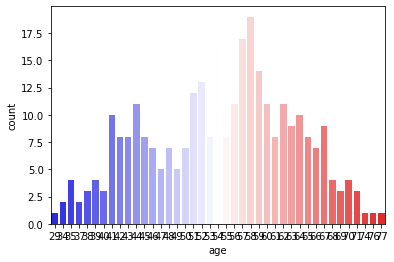

In [15]:
sns.countplot(x="target", data=heart, palette="bwr")